In [1]:

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.converters import (
    circuit_to_dag,
    dag_to_circuit,
)
from qiskit.visualization import dag_drawer

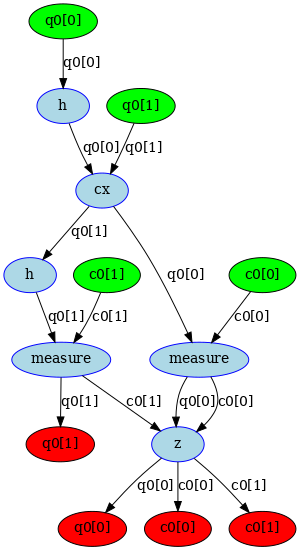

In [2]:
qreg = QuantumRegister(2)
creg = ClassicalRegister(2)
qc = QuantumCircuit(qreg, creg)
qc.h(0)
qc.cx(0, 1)
qc.h(1)
qc.measure(0, 0)
qc.measure(1, 1)
qc.z(0).c_if(creg, 3)
dag = circuit_to_dag(qc)
dag_drawer(dag)

In [3]:
for node in dag.topological_op_nodes():
    print(node.op.name, node.qargs, node.cargs)
    if node.op.name == "cx":
        print("is_controlled_gate", node.is_controlled_gate())
    if node.op.name == "z":
        print("condition", node.condition)
        target_node = node

h (Qubit(QuantumRegister(2, 'q0'), 0),) ()
cx (Qubit(QuantumRegister(2, 'q0'), 0), Qubit(QuantumRegister(2, 'q0'), 1)) ()
is_controlled_gate True
h (Qubit(QuantumRegister(2, 'q0'), 1),) ()
measure (Qubit(QuantumRegister(2, 'q0'), 0),) (Clbit(ClassicalRegister(2, 'c0'), 0),)
measure (Qubit(QuantumRegister(2, 'q0'), 1),) (Clbit(ClassicalRegister(2, 'c0'), 1),)
z (Qubit(QuantumRegister(2, 'q0'), 0),) ()
condition (ClassicalRegister(2, 'c0'), 3)


In [4]:
# dir(target_node)
target_node.condition

(ClassicalRegister(2, 'c0'), 3)

In [5]:
from copy import deepcopy
from qiskit.circuit import Operation
from qiskit.dagcircuit import DAGOpNode

new_target_node = deepcopy(target_node)

new_node = DAGOpNode(
    target_node.op,
    target_node.qargs,
    target_node.cargs,
)
new_node.condition

(ClassicalRegister(2, 'c0'), 3)

In [6]:
target_node.op.__dict__

{'_definition': None,
 '_name': 'z',
 '_num_qubits': 1,
 '_num_clbits': 0,
 '_params': [],
 '_label': None,
 '_condition': (ClassicalRegister(2, 'c0'), 3),
 '_duration': None,
 '_unit': 'dt'}

In [7]:
target_node.op._condition = 3

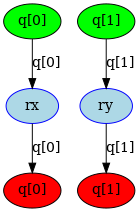

In [8]:
from qiskit.circuit import Parameter

# Create a quantum circuit with unbound parameters
theta = Parameter('θ')
phi = Parameter('φ')
qc_param = QuantumCircuit(2)
qc_param.rx(theta, 0)
qc_param.ry(phi, 1)

# Convert the circuit to a DAG and draw it
dag_param = circuit_to_dag(qc_param)
dag_drawer(dag_param)

## Custom Cored Diagrams

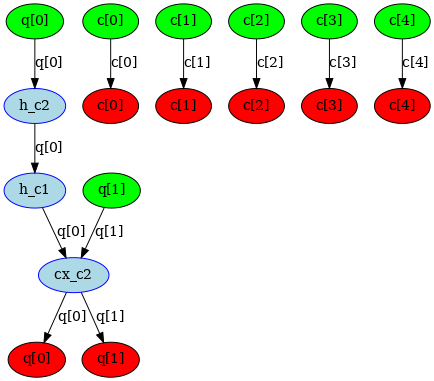

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.converters import circuit_to_dag, dag_to_circuit
from qiskit.visualization import dag_drawer
import random
import string
from qiskit.circuit.library.standard_gates import XGate
import matplotlib.pyplot as plt

# Create a simple circuit with H gate
qc_simple = QuantumCircuit(2, 5)
qc_simple.h(0)
qc_simple.h(0)
qc_simple.cx(0, 1)

dag_simple = circuit_to_dag(qc_simple)


new_dag = dag_simple.copy_empty_like()

i = 0
provenance = ["c1", "c2"]

for node in dag_simple.topological_op_nodes():
    i += 1
    prov = provenance[i % 2]
    qc = QuantumCircuit(1, name=f"{node.op.name}_{prov}")
    qc.x(0)
    custom_gate = qc.to_instruction()
    new_dag.apply_operation_back(custom_gate, node.qargs, node.cargs)

# Draw the DAG
dag_drawer(new_dag)

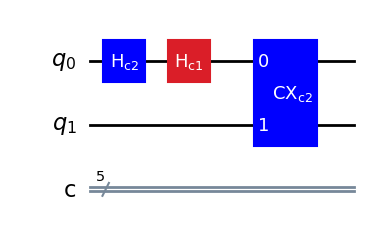

In [ ]:
# reconstruct the circuit
qc_simple = dag_to_circuit(new_dag)

my_gate_names = {
    "displaytext": {
        # gate name : gate text to be displayed
        "x": "Pauli X",
        "y": "Pauli Y",
        "z": "Pauli Z",
        "h": "Hadamard",
        "reset": "Reset",
        "id": "Identity",
        "h_c1": "H_{c1}",
        "h_c2": "H_{c2}",
        "cx_c2": "CX_{c2}",
    },
    "displaycolor": {
        "h_c1": [  # gate name
            "#da1e28",  # box color (red)
            "#FFFFFF"  # box text color (white)
        ],
        "h_c2": [  # gate name
            "#0000FF",  # box color (blue)
            "#FFFFFF"  # box text color (white)
        ],
        "cx_c2": [  # gate name
            "#0000FF",  # box color (blue)
            "#FFFFFF"  # box text color (white)
        ],
    },
}
qc_simple.draw("mpl", style=my_gate_names)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import os

# Add the parent directory to the path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

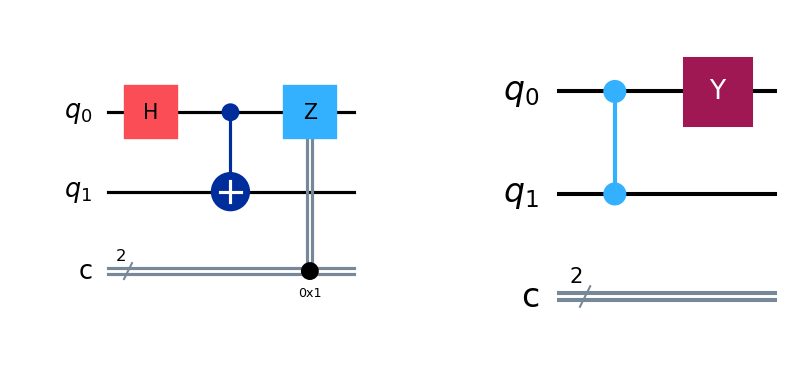

In [79]:
import matplotlib.pyplot as plt

qc_1 = QuantumCircuit(2, 2)
qc_1.h(0)
qc_1.cx(0, 1)
qc_1.z(0).c_if(qc_1.cregs[0], 1)

qc_2 = QuantumCircuit(2, 2)
qc_2.cz(0, 1)
qc_2.y(0)


fig, ax = plt.subplots(1, 2, figsize=(10, 5))

qc_1.draw("mpl", ax=ax[0])
qc_2.draw("mpl", ax=ax[1])

plt.show()
fig.savefig('images/two_base_circuits.pdf')

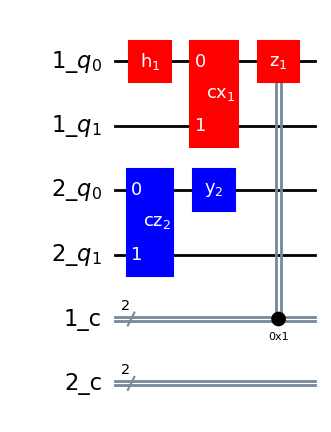

In [57]:

from generators.knitting.parallel_knitter import ParallelKnitter
pk = ParallelKnitter(qc_1, qc_2)
qc_combine = pk.combine_circuits()

qc_viz = pk.get_viz_circuit()
displaytext = pk.get_viz_map_name_to_text()
displaycolor = pk.get_viz_map_name_to_color()
qc_viz.draw("mpl",
            style={
                "displaytext": displaytext,
                "displaycolor": displaycolor})

sorted_quantum_registers:  [(QuantumRegister(2, '1_q'), 1), (QuantumRegister(2, '2_q'), 2)]
sorted_classical_registers:  [(ClassicalRegister(2, '1_c'), 1), (ClassicalRegister(2, '2_c'), 2)]


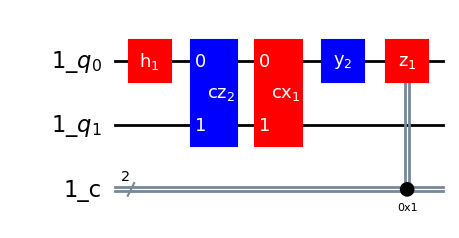

In [59]:
from generators.knitting.interleaved_knitter import InterleavedKnitter

ik = InterleavedKnitter(qc_1, qc_2)
qc_combine_interleaved = ik.combine_circuits()

qc_viz_interleaved = ik.get_viz_circuit()
displaytext_interleaved = ik.get_viz_map_name_to_text()
displaycolor_interleaved = ik.get_viz_map_name_to_color()
qc_viz_interleaved.draw("mpl",
                        style={
                            "displaytext": displaytext_interleaved,
                            "displaycolor": displaycolor_interleaved})

Node:  Instruction(name='u2', num_qubits=1, num_clbits=0, params=[0.0, 3.141592653589793])
Node:  Instruction(name='u1', num_qubits=1, num_clbits=0, params=[3.141592653589793])
Sanitized source circuit: 
     ┌─────────┐     
q_0: ┤ U2(0,π) ├──■──
     └─────────┘┌─┴─┐
q_1: ───────────┤ X ├
                └───┘
c: 2/════════════════
                     
Node: Injected Unitary, Qargs: (Qubit(QuantumRegister(4, 'qreg'), 0), Qubit(QuantumRegister(4, 'qreg'), 1)), Cargs: ()
Node: None, Qargs: (Qubit(QuantumRegister(4, 'qreg'), 0), Qubit(QuantumRegister(4, 'qreg'), 1)), Cargs: ()
Node: None, Qargs: (Qubit(QuantumRegister(4, 'qreg'), 0),), Cargs: ()


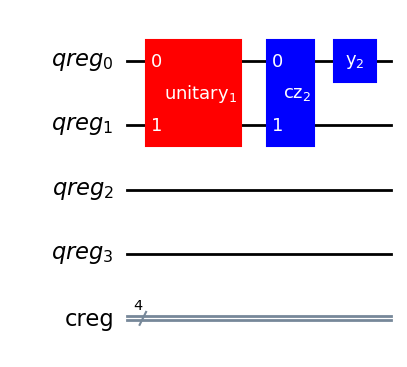

In [78]:
from generators.knitting.unitary_knitter import UnitaryKnitter

uk = UnitaryKnitter(qc_1, qc_2)
qc_combine_unitary = uk.combine_circuits()

qc_viz_unitary = uk.get_viz_circuit()
displaytext_unitary = uk.get_viz_map_name_to_text()
displaycolor_unitary = uk.get_viz_map_name_to_color()
qc_viz_unitary.draw("mpl",
                    style={
                        "displaytext": displaytext_unitary,
                        "displaycolor": displaycolor_unitary})

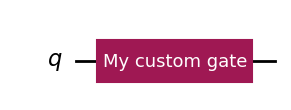

In [73]:
from qiskit.quantum_info import Operator
import numpy as np

# Define a 2x2 matrix
matrix = np.array([[0, 1], [1, 0]])

# Create an Operator from the matrix
op = Operator(matrix).to_instruction()
op.label = "My custom gate"

# Create a quantum circuit and add the custom gate
qc_custom = QuantumCircuit(1)
qc_custom.append(op, [0])

# Draw the circuit
qc_custom.draw('mpl')

QC1:
     ┌───┐      ┌───┐ 
q_0: ┤ H ├──■───┤ Z ├─
     └───┘┌─┴─┐ └─╥─┘ 
q_1: ─────┤ X ├───╫───
          └───┘┌──╨──┐
c: 2/══════════╡ 0x1 ╞
               └─────┘
QC3:
            
q_0: ───────
      ┌───┐ 
q_1: ─┤ Z ├─
      └─╥─┘ 
     ┌──╨──┐
c: 2/╡ 0x1 ╞
     └─────┘
Node:  Instruction(name='u2', num_qubits=1, num_clbits=0, params=[0.0, 3.141592653589793])
Node:  Instruction(name='u1', num_qubits=1, num_clbits=0, params=[3.141592653589793])
Combined circuit: 
        ┌───────────────────┐       
qreg_0: ┤0                  ├───────
        │  Injected Unitary │ ┌───┐ 
qreg_1: ┤1                  ├─┤ Z ├─
        └───────────────────┘ └─╥─┘ 
                             ┌──╨──┐
creg: 2/═════════════════════╡ 0x1 ╞
                             └─────┘
Combined QC:
        ┌───────────────────┐       
qreg_0: ┤0                  ├───────
        │  Injected Unitary │ ┌───┐ 
qreg_1: ┤1                  ├─┤ Z ├─
        └───────────────────┘ └─╥─┘ 
                             ┌──╨──

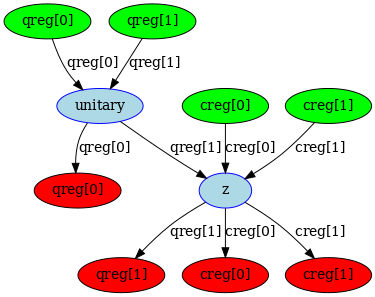

In [86]:
qc_1 = QuantumCircuit(2, 2)
qc_1.h(0)
qc_1.cx(0, 1)
qc_1.z(0).c_if(qc_1.cregs[0], 1)

qc_3 = QuantumCircuit(2, 2)
qc_3.z(1).c_if(qc_3.cregs[0], 1)

print("QC1:")
print(qc_1)
print("QC3:")
print(qc_3)

uk = UnitaryKnitter(qc_1, qc_3)
qc_combine = uk.combine_circuits()
print("Combined QC:")
print(qc_combine)

print("Quantum Registers:", qc_combine.qregs)
print("Classical Registers:", qc_combine.cregs)

dag_combine = circuit_to_dag(qc_combine)
dag_drawer(dag_combine)

In [6]:
from generators.knitting.sequential_knitter import SequentialKnitter
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qc_1 = QuantumCircuit(2, 2)
qc_1.h(0)
qc_1.cx(0, 1)
qc_1.z(0).c_if(qc_1.cregs[0], 1)

qc_3 = QuantumCircuit(2, 2)
qc_3.z(1).c_if(qc_3.cregs[0], 1)

print("QC1:")
print(qc_1)
print("QC3:")
print(qc_3)

sk = SequentialKnitter(qc_1, qc_3)
qc_combine = sk.combine_circuits()
print("Combined QC:")
print(qc_combine)

print("Quantum Registers:", qc_combine.qregs)
print("Classical Registers:", qc_combine.cregs)

dag_combine = circuit_to_dag(qc_combine)
dag_drawer(dag_combine)

QC1:
     ┌───┐      ┌───┐ 
q_0: ┤ H ├──■───┤ Z ├─
     └───┘┌─┴─┐ └─╥─┘ 
q_1: ─────┤ X ├───╫───
          └───┘┌──╨──┐
c: 2/══════════╡ 0x1 ╞
               └─────┘
QC3:
            
q_0: ───────
      ┌───┐ 
q_1: ─┤ Z ├─
      └─╥─┘ 
     ┌──╨──┐
c: 2/╡ 0x1 ╞
     └─────┘


AttributeError: '_SingletonHGate' object has no attribute 'qargs'